### ¿Qué es ruido impulsivo "Sal y pimienta" en imágenes?

El ruido impulsivo o sal y pimienta (salt-and-pepper) se trata de una clase de contaminación que es causada por defectos en los pixeles de los sensores de las cámaras, una locación en memoria del hardware defectuosa o directamente ruido en un canal de transmisión [1].

Estos defectos provocan una imagen corrupta con una serie de pixeles con ruido que solo pueden tomar valores máximos o mínimos de color y esto se conoce coloquialmente como sal y pimienta, donde la sal hace ilusión a todos los pixeles que entran en el valor máximo o blanco y la pimienta son aquellos que alcanzan el valor mínimo o negro.

Por otro lado, el procesamiento de la imagen que realiza después de la captura de esta, requiere de un proceso de detección y eliminación del ruido. En este punto entran los filtros de remoción, siendo el más usual el filtro mediano de tipo no linear que es muy utilizado por su alta eficiencia y buena eliminación de ruido pero con la consideración que con una corrupción mayor de 50% algunos detalles de la imagen original quedaran manchadas.

La ecuación matemática que modela el comportamiento del ruido impulsivo en una imagen es la siguiente:


$$
  P_{sp} ( z )  = \Biggl\{ \hspace{3mm} 
  \begin{align*}
  P_p \hspace{1mm} , \hspace{3mm} z=p \\
  P_s \hspace{1mm} , \hspace{3mm} z=s
    \end{align*}
$$

De la anterior ecuación indicamos que "***z***" es el porcentaje de pixeles que tendrán ruido y para este sea homogéneo  "***z***" se dividira en dos, siendo la mitad corrupción blanca y otra mitad negra.

In [1]:
###
# Author: Murilo Barrientos Alexis Adrian
###
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random as rd
from math import sqrt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [2]:
# Clase que genera diferentes tipos de ruidos
class GenerateNoise:
    def __init__(self):
        print("Todo salio bien")

    # Método que genera a una imagen un ruido de sal y pimienta por medio de un porcentaje
    def impulsive_noise(self, path_img=None, noise_percentage=0):
        if path_img is None or noise_percentage == 0:
            print("Metiste mal los valores!")

        else:
            image = cv.imread(path_img)
            self.size_img = image.shape[0]*image.shape[1]
            self.noise_percentage_to_use = (noise_percentage*self.size_img)/200

            if image.shape[2] > 1:
                self.pepper = [0, 0, 0]
                self.salt = [255, 255, 255]
            elif image.shape[2] == 1:
                self.pepper = 0
                self.salt = 255

            # pixeles blancos
            for x in range(int(self.noise_percentage_to_use)):
                position_x = rd.randrange(2, image.shape[0]-2)
                position_y = rd.randrange(2, image.shape[1]-2)

                image[position_x][position_y] = self.salt

            # pixeles negros
            for x in range(int(self.noise_percentage_to_use)):

                position_x = rd.randrange(2, image.shape[0]-2)
                position_y = rd.randrange(2, image.shape[1]-2)

                image[position_x][position_y] = self.pepper

            # Retorna la imagen contaminada
            return image

        # Método que genera a una imagen un ruido Guassiano por medio de indicar la desviación estándar
    def guassiano_noise(self, path_img=None, standard_deviation=1):
        if path_img != None:
            image = cv.imread(path_img)
            self.std_dev = standard_deviation
            dist_nor = np.random.normal(0, self.std_dev, size=image.shape[0:2])
            for i in range(dist_nor.shape[0]):
                for j in range(dist_nor.shape[1]):
                    dist_nor[i][j] = int(round(((dist_nor[i][j])*self.std_dev) + 127))

            dist_nor = np.array(dist_nor, dtype=np.uint8)

            for i in range(dist_nor.shape[0]):
                for j in range(dist_nor.shape[1]):
                    for k in range(image.shape[2]):
                        if dist_nor[i][j] == 127:
                            continue
                        else:
                            image[i][j][k] = dist_nor[i][j]

            return image
        else:
            print("por si todo sale mal")



Todo salio bien


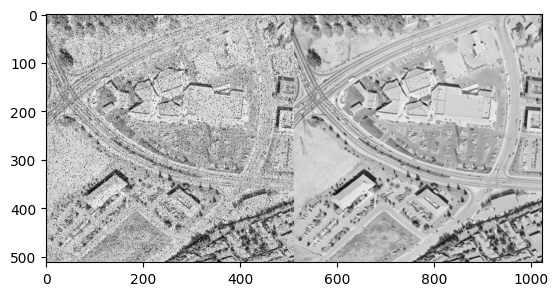

In [3]:
image = GenerateNoise().impulsive_noise("Imagenes Originales Gris/Aerial_gray.png", 10)
image_1 = cv.imread("Imagenes Originales Gris/Aerial_gray.png")
final_frame = cv.hconcat((image, image_1))

plt.imshow(final_frame)

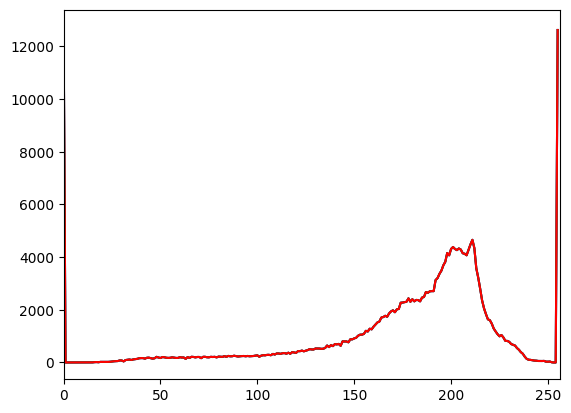

In [4]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

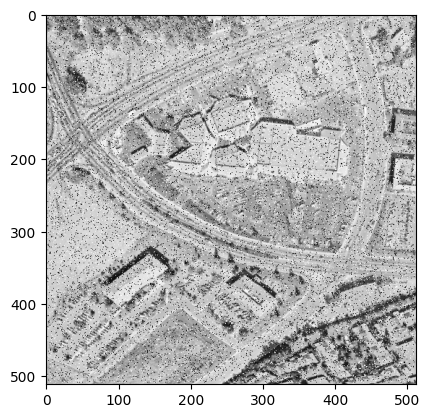

In [5]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [6]:
image[0][9] = [0, 0, 0]

In [7]:
image.shape[0:2]

(512, 512)

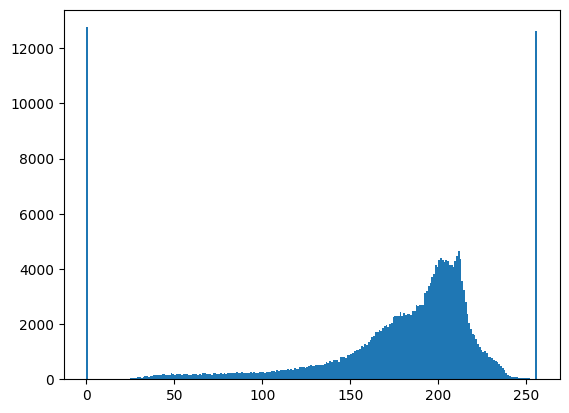

In [8]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

### ***¿Qué es el ruido guassiano en imágenes?***

El ruido gaussiano que se adicionan a una imagen es el que ensucia la señal, de tal manera que se obtienen pixeles al azar por toda la imagen que se guían en su tonalidad en base a una distribución uniforme de color.

Su importancia radica en que debido a que está presente de manera inherente en el ambiente, más por el hecho que los factores que lo generan son muchos y muy diversos, un ejemplo es el ruido blanco que percibe las cuando la señal de la estación de televisión es débil, ahora bien, especificando en las imágenes, a la hora de su obtención o capturo, el ruido gaussiano se genera en ocasiones con baja iluminación donde es más fácil percibir fotones de ruido originados de distintos lugares, pero cabe recalcar que no solo en estas ocasiones este ruido se modela por medio de la distribución normal o de Gauss, si no que también hay casos con la distribución de Poison.

En la mayoría de la literatura cuando se trata de agregar este tipo de ruido a una imagen se guían por la distribución normal estándar donde el valor μ es igual a 0 y solo se hace variar le desviación estándar o en su defecto la varianza, aunque estas dos últimas depende directamente la una de la otra, por ende, mover una hace que la otra también se mueva.

Como último, la ecuación que modela el ruido gaussiano es la misma de la distribución del mismo nombre, pero en este caso, como ya se mencionó, mu o la media (***μ***) lo evaluamos en 0 y variamos la deviación estándar (***σ***).


  \begin{equation}
    P_G = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}  
  \end{equation}

In [9]:
def distribucion_normal(x, standard_deviation):
    return (1/(standard_deviation*np.sqrt(2*np.pi)))*((np.e)**((-1/2)*((x/standard_deviation)**2)))
    

In [10]:
x = np.linspace(4, -4, 100)

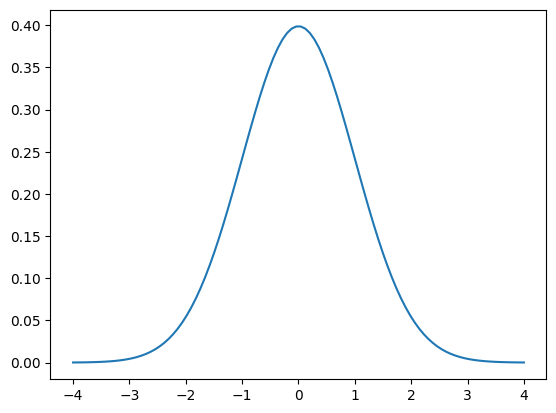

In [11]:
plt.plot(x, distribucion_normal(x, standard_deviation=1))

(512, 512, 3)


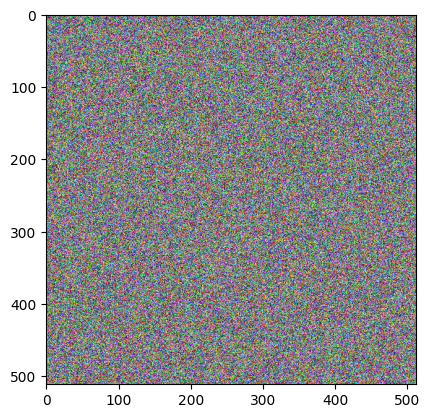

In [12]:
dist_nor = np.random.normal(0, 1, size=image.shape)
dist_nor
desviación = 100
for i in range(dist_nor.shape[0]):
    for j in range(dist_nor.shape[1]):
        for k in range(dist_nor.shape[2]):
            dist_nor[i][j][k] = int(round(((dist_nor[i][j][k])*desviación) + 127, ndigits=0))

dist_nor = np.array(dist_nor, dtype=np.uint8)
print(dist_nor.shape)
n = plt.imshow(dist_nor)
n


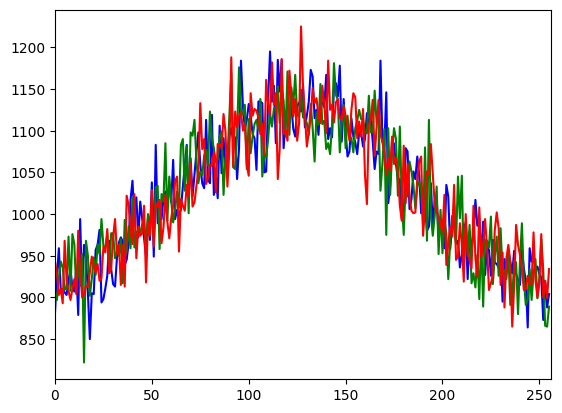

In [13]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([dist_nor],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [14]:
type(image[1][2][1])

numpy.uint8

Todo salio bien


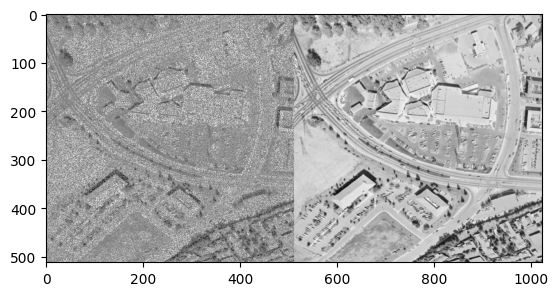

In [15]:
n = GenerateNoise().guassiano_noise("Imagenes Originales Gris/Aerial_gray.png", .9)
image_1 = cv.imread("Imagenes Originales Gris/Aerial_gray.png")
final_frame = cv.hconcat((n, image_1))

plt.imshow(final_frame)

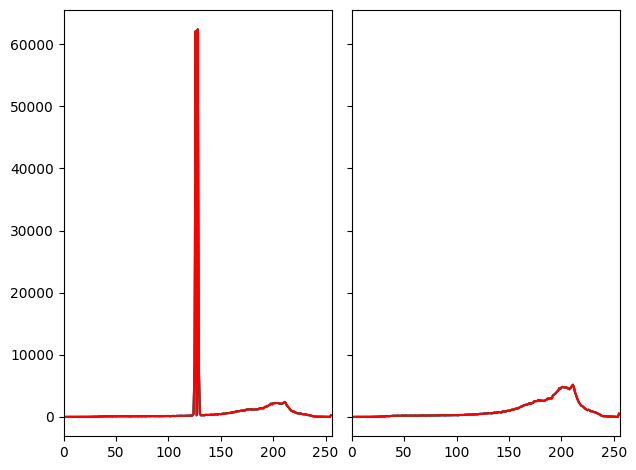

In [16]:
color = ('b','g','r')
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

for i,col in enumerate(color):
    histr = cv.calcHist([n],[i],None,[256],[0,256])
    axs[0].plot(histr,color = col)
    axs[0].set_xlim([0,256])

for i,col in enumerate(color):
    histr_1 = cv.calcHist([image_1],[i],None,[256],[0,256])
    axs[1].plot(histr_1,color = col)
    axs[1].set_xlim([0,256])
plt.show()

### ***¿Qué es el filtro de Fourier?***

#### ***¿Qué son las Series de Fourier?***

Antes de hablar completamente de que es el filtro de Fourier, debemos abordar primero la idea de que es una serie trigonométrica, que se define como una sumatoria infinita de la forma (3), la cual como su nombre lo indica, se trata de una suma de senos y cosenos que están definidos en un periodo de $2\pi$ y donde si alguno de los coeficientes an y bn es diferente de cero, entonces el grado del polinomio es $N$ [7].

$$
\begin{equation}
\frac{a_0}{2} + \sum_{k=1}^{\infty}(a_k\cos{kx} + b_k \sin{kx})
\end{equation}
$$


De ahí nace la función de Fourier

Para ello se sabe que la función de Fourier es:

$$
\begin{equation}
\displaystyle{f(x) = \frac{a_0}{2} + \sum \limits_{n = 1}^\infty \left[ a_n { \cos(n x)} + b_n {\sin(nx)}\right]}
\end{equation}
$$

$f(x)$ es una función periódica para $x\in \left[−\pi, \pi\right]$ de la cual se desea encontrar una representación. $a_{0}$ es una constante,

$$
a_0 = \displaystyle{\frac{1}{L} \int \limits_{-L}^{L} f(x) dx },
$$

$a_{n}$ y $b_{n}$ se definen como:

$$
a_n = \displaystyle{\frac{1}{L} \int \limits_{-L}^{L} f(x) {\cos(\frac{n\pi x}{L}) }dx },
$$

$$
b_n = \displaystyle{\frac{1}{L} \int \limits_{-L}^{L} f(x) {\sin(\frac{n\pi x}{L}) }dx }.
$$

Esta misma nace de su versión compleja la cual es la serie compleja de Fourier, que es una herramienta matemática muy importante para tratar problemas de funciones periódicas al descomponer una función $f(t)$ como una combinación lineal de funciones armónicas y presenta sus coeficientes como una función discreta que depende de las frecuencias armónicas de la serie, pero no todas las funciones son periódicas por lo que es necesario desarrollar un procedimiento [8].


$$
\begin{equation}
f(t) = \sum_{n=-\infty}^{\infty} \frac{1}{T} \int_{-T/2}^{T/2} f(τ)e^{-ω_n τ} dτ e^{ω_n τ}
\end{equation}
$$

#### ***¿Qué es la tranformada de Fourier?***

Las Transformada de Fourier se define como una función matemática que al igual que transformada de Laplace, permite como primera línea, el transformar un problema complicado en otro más fácil de resolver y luego obtener la solución al problema original por medio de la función inversa de la transformada de Fourier, resolviendo el problema, y la transformada se expresa de la siguientes maneras:

$\bullet$ Continua:

$$
X(F) =  \displaystyle\int_{-\infty}^{\infty} x(t)  e^{-j2\pi Ft} dt 
$$
<br>

$\bullet$ Discreta:
$$
X_{k} = \displaystyle\sum_{n=0}^{N-1} x_{n} \cdot e^{-\frac{j2\pi kn}{N}}
$$

<br>
Dónde: 
<br>

$\bullet$ Frecuencia $F=\frac{k}{N}$ <br>
$\bullet$ Timpo $n=t$


La transformada tiene muchas aplicaciones como en el análisis de señales en el dominio de la frecuencia de un sistema lineal y las ecuaciones diferenciales lineales no son la excepción dado que la respuesta también puede estudiarse en el dominio de la frecuencia, donde es posible identificar la relación de la señal de entrada con la señal de salida mediante un producto de funciones. [8]
 
#### ***¿Qué es la tranformada de Fourier?***

Ahora bien, siendo más específicos en la aplicación de la transformada de Fourier, tenemos al filtrado de señales, donde como su nombre lo indica se aplica la transformada de Fourier para obtener las frecuencias más importantes de la señal descartando así ruido en general que se encuentra fuera del espectro de la señal, y tomando la idea de que al final una imagen se puede traducir o pasar a una señal de varios canales, nos lleva a la conclusión que una imagen puede ser filtrado por Fourier para sacar el ruido que pueda tener esta imagen.


Esta misma conclusión lleva a la existencia del filtro de Fourier, que obtiene los datos más representativos de la imagen y los aísla de tal manera que definiendo un círculo de corte que solo contenga lo más importante de la imagen, podemos eliminar hasta determinado punto el ruido en una imagen, pero ahí depende mucho del tipo de imagen en referencia a su contraste y detalle, así mismo su nivel de ruido, lo cual llevara a tener que variar el radio de corte para obtener mejores imágenes filtradas.

In [17]:
# Clase que elimina por ditintos metos el ruido en imagenes
class RemoveNoise:
    def __init__(self):
        print("todo salio bien")


    # Método que elimina ruido por medio del filtro de Fourier
    def filtro_de_fourier(self, img_path=None, log=None, radio_corte=.14):
        if img_path is not None:
            if log==None:
                self.val_log = 20
                print("El valor para el logaritmo es de 20")
            else: 
                self.val_log = log

            img = cv.imread(img_path)
            img_grey = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
            img_grey_float = np.float64(img_grey)
            fourier_img = np.fft.fft2(img_grey_float)
            fourier_shift_img = np.fft.fftshift(fourier_img)
            magnitude_espectrum = self.val_log*np.log10(np.abs(fourier_shift_img))
            Nf = img.shape[0]
            Nc = img.shape[1]
            F1=np.arange(-Nf/2+1,Nf/2+1,1)
            F2=np.arange(-Nc/2+1,Nc/2+1,1)
            [X,Y]=np.meshgrid(F1,F2)
            D=np.sqrt(X**2+Y**2)
            D=D/np.max(D)
            #DEFINIR RADIO DE CORTE
            Do=radio_corte
            #Creación del Filtro Ideal en 2D
            Huv=np.zeros((Nf,Nc))
            # PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
            for i in range(Nf):
                for j in range(Nc):
                    if(D[i,j]<Do):
                        Huv[i,j]=1
            # "FILTRO 2D PASA ALTO IDEAL"
            Huv_image = np.zeros([Nf,Nc,3],dtype=np.uint8)
            for i in range(Nf):
                for j in range(Nc):
                    Huv_image[i,j] = Huv[i,j]
            Huv_grey = cv.cvtColor(Huv_image, cv.COLOR_RGB2GRAY)
            Guv = Huv_grey*fourier_shift_img
            filtered_img = np.fft.ifft2(Guv)
            filtered_img = np.abs(filtered_img)
            filtered_img = np.uint8(filtered_img)
            
            return [img, img_grey, fourier_img, fourier_shift_img, magnitude_espectrum, Huv_grey, np.abs(Guv), filtered_img]

        else:
            if img_path==None:
                print("Agrega un path")

    def ssim_psnr(self, img_original, img_fourier, title):
        self.img_original = cv.cvtColor(img_original, cv.COLOR_RGB2GRAY)

        ss = ssim(self.img_original, img_fourier)
        peak = psnr(self.img_original, img_fourier)

        plt.suptitle(title+" SSIM %.5f" %(ss) + ", PSNR %.2f" %(peak) )

        a = plt.subplot(121)
        plt.imshow(self.img_original, cmap='gray', vmin=0, vmax=255)

        b = plt.subplot(122)
        plt.imshow(img_fourier, cmap='gray', vmin=0, vmax=255)

        plt.show()



In [18]:
RemoveNoise()

todo salio bien


Todo salio bien
<class 'numpy.ndarray'>


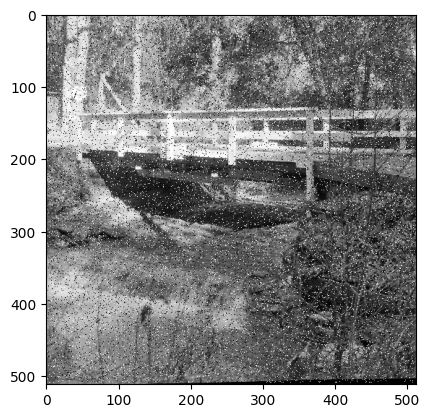

In [19]:
image_2 = GenerateNoise().impulsive_noise("Imagenes Originales Gris/Bridge_gray.png", 10)
cv.imwrite("imagenes_con_ruido/Brigde_gray_with_salt.png", image_2)
print(type(image_2))
plt.imshow(image_2)


todo salio bien
El valor para el logaritmo es de 20
todo salio bien


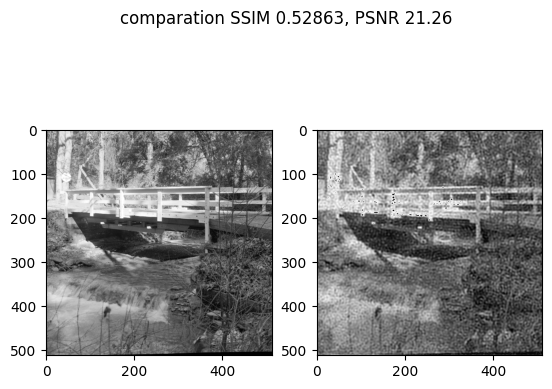

In [20]:
image_3 = RemoveNoise().filtro_de_fourier("imagenes_con_ruido/Brigde_gray_with_salt.png",radio_corte=.242)
img_org = cv.imread("Imagenes Originales Gris/Bridge_gray.png")
RemoveNoise().ssim_psnr(img_org, image_3[7], "comparation")
img_org = cv.cvtColor(img_org, cv.COLOR_RGB2GRAY)

In [21]:
image_3 = RemoveNoise().filtro_de_fourier("imagenes_con_ruido/Brigde_gray_with_salt.png",radio_corte=.70)


todo salio bien
El valor para el logaritmo es de 20


<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.complex128'>
<class 'numpy.complex128'>
<class 'numpy.float64'>
<class 'numpy.uint8'>
<class 'numpy.float64'>
<class 'numpy.uint8'>


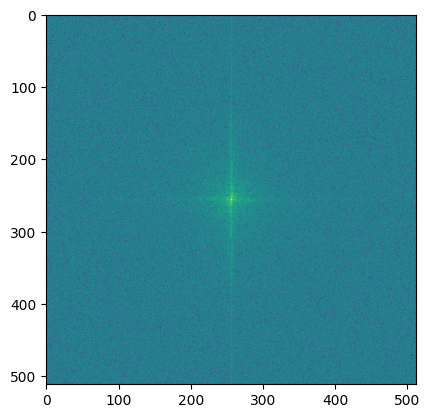

In [22]:
for i in range(8):
    print(type(image_3[i][1][1]))


plt.imshow(image_3[4])

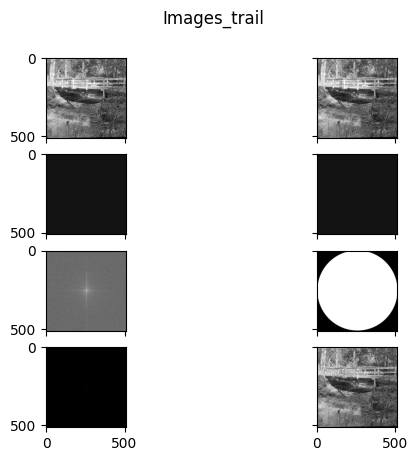

In [23]:
fig, axs = plt.subplots(4, 2)
fig.suptitle("Images_trail")
plt.gray()
index = 0
for i in range(4):
    for j in range(2):
        if image_3[index].dtype == np.complex128:
            axs[i][j].imshow(image_3[index].real)
            index += 1
            axs[i][j].label_outer()
        else:
            axs[i][j].imshow(image_3[index].real)
            index += 1
            axs[i][j].label_outer()

plt.show()

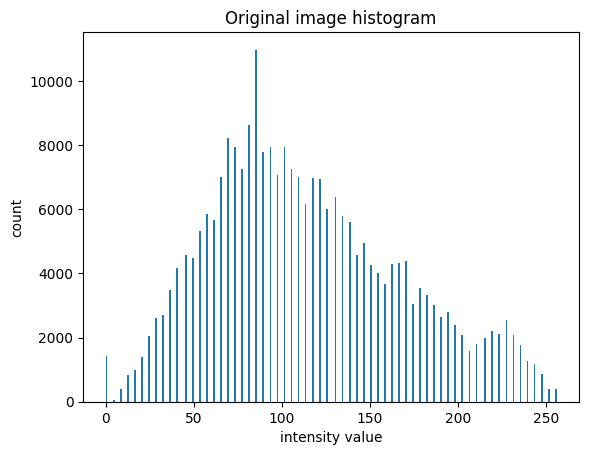

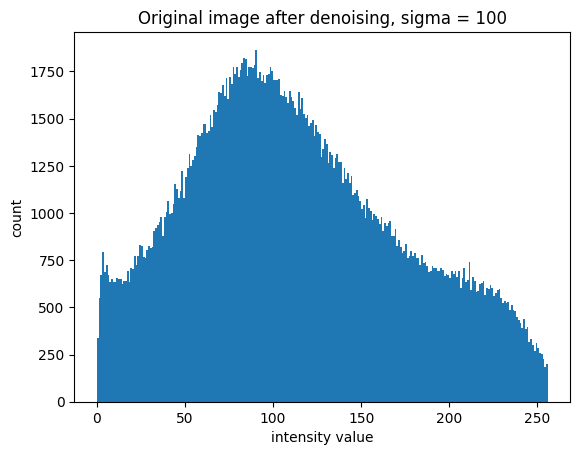

In [24]:
plt.title("Original image histogram")
plt.hist(img_org.ravel(),bins = 256, range = [0,256])
plt.xlabel('intensity value')
plt.ylabel('count') 
plt.show()
plt.title("Original image after denoising, sigma = 100")
plt.hist(image_3[7].ravel(),bins = 256, range = [0,256])
plt.xlabel('intensity value')
plt.ylabel('count') 
plt.show()

In [25]:
x = np.linspace(0.14, 0.70, 113)
x = np.round(x, decimals=3)
# a = float(x[1])
# type(a)
# print(a)

todo salio bien


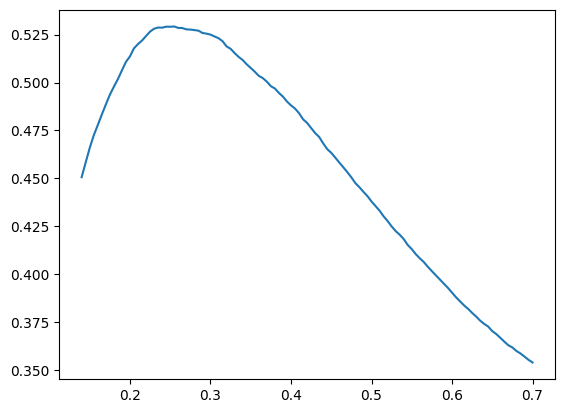

In [34]:
img_org_1 = cv.imread("Imagenes Originales Gris/Bridge_gray.png")
img_f = RemoveNoise()
def ssim_furier(img_org, a, img_f):
    img = img_f.filtro_de_fourier("imagenes_con_ruido/Brigde_gray_with_salt.png",log=20,radio_corte=a)
    img_org = cv.cvtColor(img_org, cv.COLOR_RGB2GRAY)
    ss = ssim(img_org, img[7])
    return ss

y = []
for i in range(113):
    y.append(ssim_furier(img_org_1, x[i], img_f))

y = np.array(y, dtype=np.float64)

plt.plot(x,y)
plt.show()

Todo salio bien


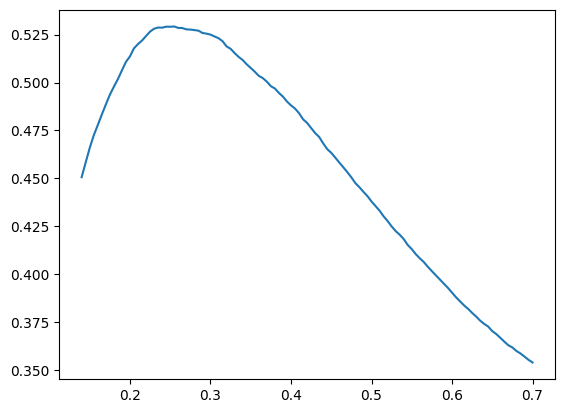

In [36]:
image_2_1 = GenerateNoise().impulsive_noise("Imagenes Originales Gris/Peppers_gray.png", 10)
cv.imwrite("imagenes_con_ruido/Peppers_gray_with_salt.png", image_2_1)
img_org_2 = cv.imread("Imagenes Originales Gris/Peppers_gray.png")
def ssim_furier(img_org, a, img_f):
    img = img_f.filtro_de_fourier("imagenes_con_ruido/Peppers_gray_with_salt.png",log=20,radio_corte=a)
    img_org = cv.cvtColor(img_org, cv.COLOR_RGB2GRAY)
    ss = ssim(img_org, img[7])
    return ss

y_1 = []
for i in range(113):
    y_1.append(ssim_furier(img_org_2, x[i], img_f))

y_1 = np.array(y, dtype=np.float64)

plt.plot(x,y_1)
plt.show()

Todo salio bien
todo salio bien


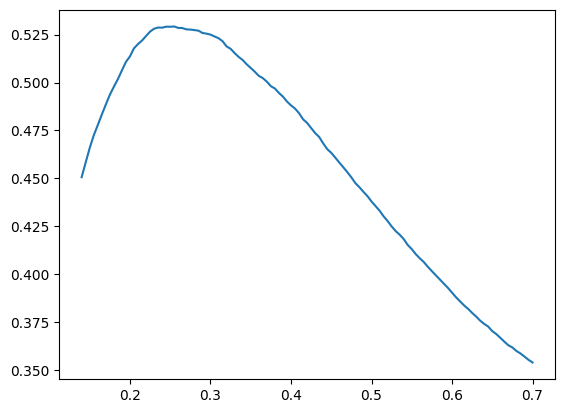

In [35]:
image_2_2 = GenerateNoise().impulsive_noise("Imagenes Originales Gris/Airplane_gray.png", 10)
cv.imwrite("imagenes_con_ruido/Airplane_gray_with_salt.png", image_2_2)
img_org_3 = cv.imread("Imagenes Originales Gris/Airplane_gray.png")
img_f = RemoveNoise()
def ssim_furier(img_org, a, img_f):
    img = img_f.filtro_de_fourier("imagenes_con_ruido/Airplane_gray_with_salt.png",log=20,radio_corte=a)
    img_org = cv.cvtColor(img_org, cv.COLOR_RGB2GRAY)
    ss = ssim(img_org, img[7])
    return ss

y_2 = []
for i in range(113):
    y_2.append(ssim_furier(img_org_3, x[i], img_f))

y_2 = np.array(y, dtype=np.float64)

plt.plot(x,y_2)
plt.show()

In [29]:
y_1_max = np.argmax(y)
img_fourier_1 = img_f.filtro_de_fourier("imagenes_con_ruido/Brigde_gray_with_salt.png",log=20,radio_corte=x[y_1_max])
y_2_max = np.argmax(y_1)
img_fourier_2 = img_f.filtro_de_fourier("imagenes_con_ruido/Peppers_gray_with_salt.png",log=20,radio_corte=x[y_2_max])
y_3_max = np.argmax(y_2)
img_fourier_3 = img_f.filtro_de_fourier("imagenes_con_ruido/Airplane_gray_with_salt.png",log=20,radio_corte=x[y_3_max])

In [37]:
img_org_1 = cv.cvtColor(img_org_1, cv.COLOR_RGB2GRAY)

In [38]:
img_org_2 = cv.cvtColor(img_org_2, cv.COLOR_RGB2GRAY)

In [39]:
img_org_3 = cv.cvtColor(img_org_3, cv.COLOR_RGB2GRAY)

In [40]:
image_2 = cv.cvtColor(image_2, cv.COLOR_RGB2GRAY)
image_2_1 = cv.cvtColor(image_2_1, cv.COLOR_RGB2GRAY)
image_2_2 = cv.cvtColor(image_2_2, cv.COLOR_RGB2GRAY)

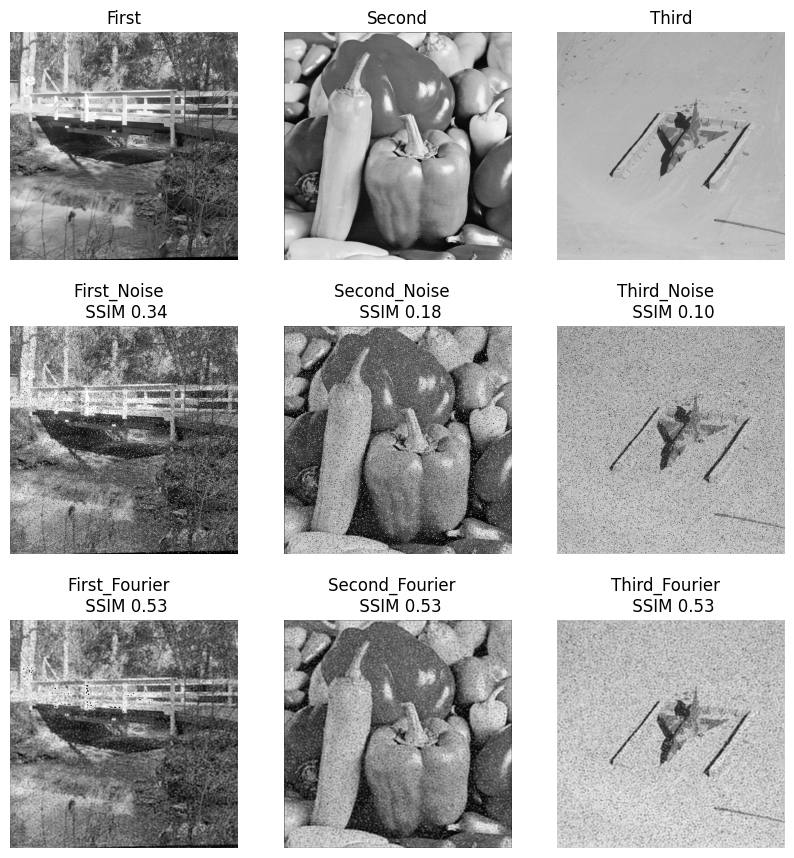

In [52]:
fig = plt.figure(figsize=(10, 7))

rows = 3
columns = 3

names = ["First", "Second", "Third", "First_Noise", "Second_Noise", "Third_Noise", "First_Fourier", "Second_Fourier", "Third_Fourier"]

simm_values = []
simm_values.append(ssim(img_org_1, image_2))
simm_values.append(ssim(img_org_2, image_2_1))
simm_values.append(ssim(img_org_3, image_2_2))
simm_values.append(y[y_1_max])
simm_values.append(y_1[y_2_max])
simm_values.append(y_2[y_3_max])

images_collection = [img_org_1, img_org_2, img_org_3,image_2, image_2_1, image_2_2, img_fourier_1[7], img_fourier_2[7], img_fourier_3[7]]

for i in range(9):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(images_collection[i])
    plt.axis('off')
    if i > 2:
        plt.title(f"{names[i]}  \n" + " SSIM %.2f" %(simm_values[i-3]))
    else:
        plt.title(names[i])

plt.subplots_adjust(top=1.3)
